In [1]:
import theano
from theano import tensor

In [2]:
a = tensor.dscalar()
b = tensor.dscalar()

In [3]:
c = a + b

In [4]:
f = theano.function([a,b],c)

In [6]:
result = f(1.5,2.5)

In [7]:
import tensorflow as tf

In [8]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
add = tf.add(a,b)

In [9]:
sess = tf.Session()
binding={a:1.5,b:2.5}

In [10]:
c = sess.run(add, feed_dict=binding)
print(result)

4.0


In [13]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import sys
sys.path.append('/path/to/dir')

seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, nb_epoch=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
768/768 [==============================] - 0s - loss: 0.6771 - acc: 0.6510     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.6595 - acc: 0.6510     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.6474 - acc: 0.6510     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.6386 - acc: 0.6510     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6321 - acc: 0.6510     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6184 - acc: 0.6510     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6163 - acc: 0.6510     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6136 - acc: 0.6510     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6041 - acc: 0.6888     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6030 - acc: 0.6888     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.5959 - acc

/Users/yoshi/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [22]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

def create_model():
	# Create model
	model = Sequential()
	...
	# Compile model
	model.compile(...)
	return model

# create classifier for use in scikit-learn
model = KerasClassifier(build_fn=create_model, nb_epoch=150, batch_size=10)
# evaluate model using 10-fold cross validation in scikit-learn
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)


TypeError: compile() missing 1 required positional argument: 'loss'

/Users/yoshi/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/keras/preprocessing/image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')
/Users/yoshi/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/keras/preprocessing/image.py:787: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' (' + str(self.x.shape[channels_axis]) + ' channels).')


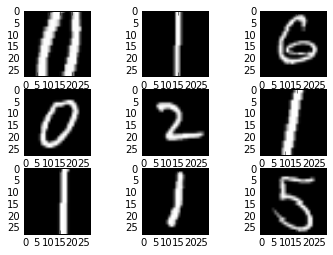

In [25]:
%matplotlib inline

# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break